In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v3 import *
from calc_functions_v3 import *
from graph_functions_v3 import *

Today is 11/04/2021. Retrieve data from how many days? 0
Ok, will retrieve data from 11/04/2021


# Fusion SIDEP et données hospitalières

In [3]:
fname = temp_path(date_choice, 'vacsi-a-dep', 'tot-3C')
dvac = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'donnees-hospitalieres-classe-age-covid19', '3C-hebd')
dhos = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'sp-pos-quot-dep', 'tot-3C-hebd')
dtes = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d = pd.merge(dtes, dhos, how = 'outer')
d = pd.merge(d, dvac, how = 'outer')
d = d.sort_values(['entity', 'three_class', 'jour'])

./Temp/5Lv3/vacsi-a-dep-2021-04-11-18h15-tot-3C.csv
./Temp/5Lv3/donnees-hospitalieres-classe-age-covid19-2021-04-11-18h02-3C-hebd.csv
./Temp/5Lv3/sp-pos-quot-dep-2021-04-11-18h07-tot-3C-hebd.csv


# Graphes

In [4]:
regions = ['Auvergne-Rhône-Alpes',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire',
       'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']
last_week = ((d.jour > np.datetime64(dt.datetime.fromisoformat(date_choice) - dt.timedelta(weeks = 1))) 
             & (d.jour <= np.datetime64(dt.datetime.fromisoformat(date_choice))))

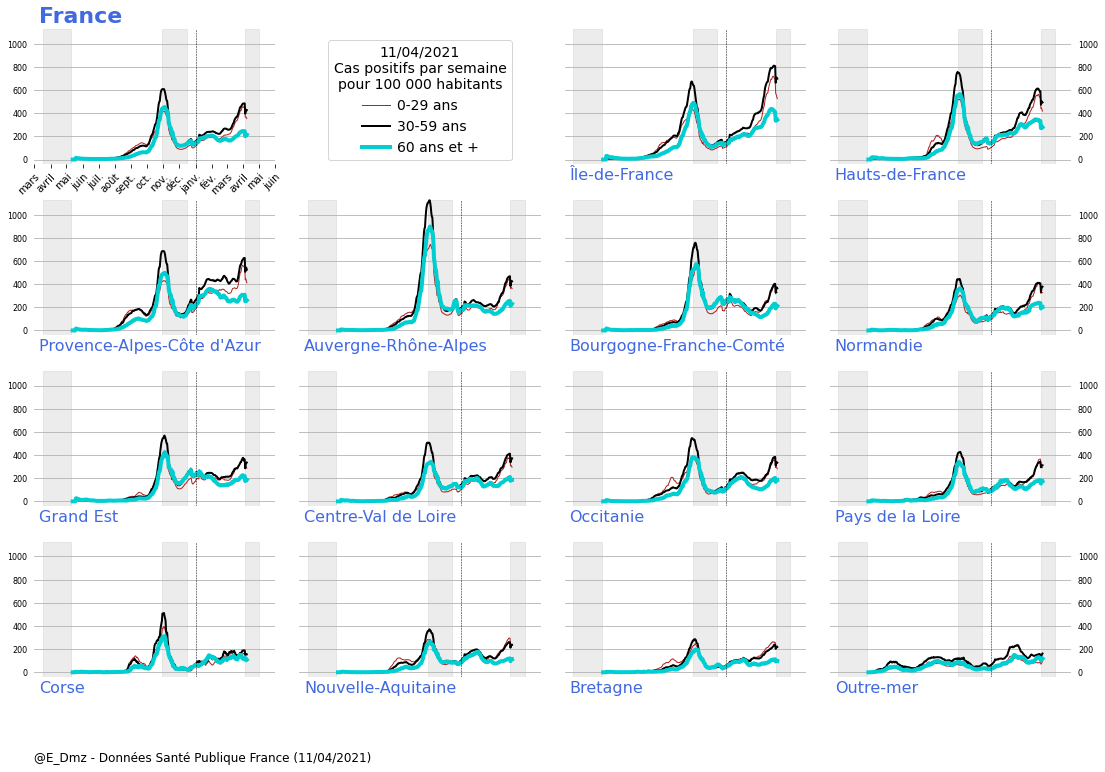

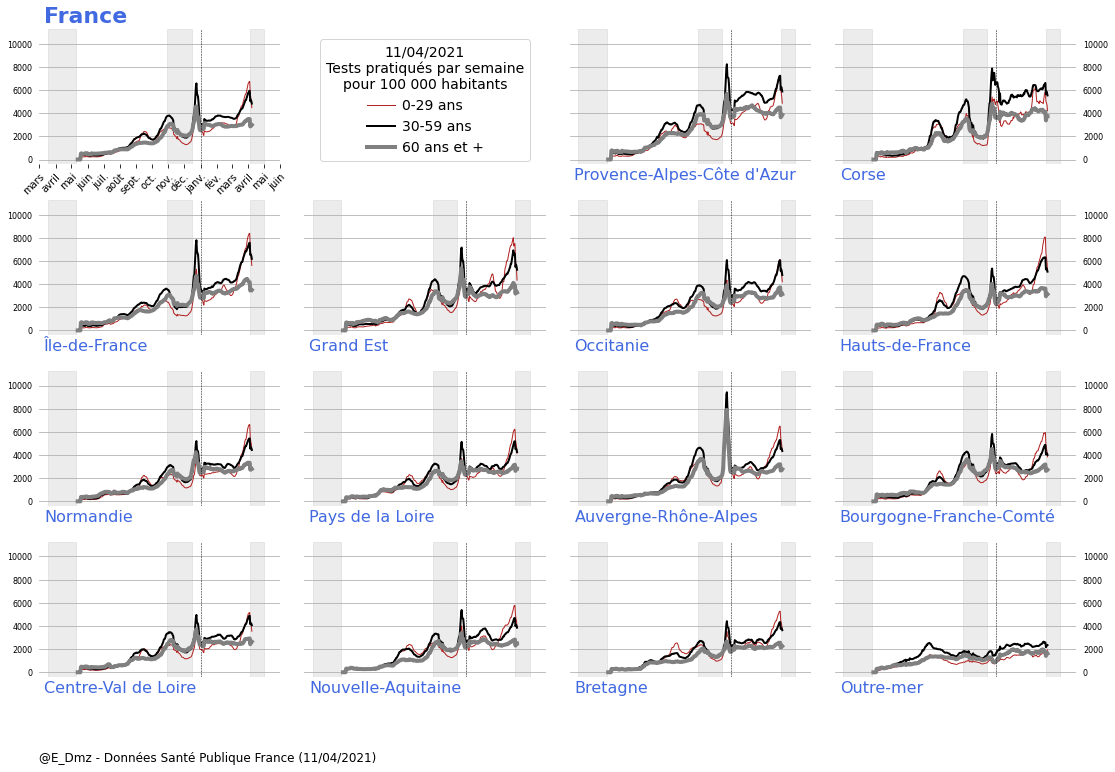

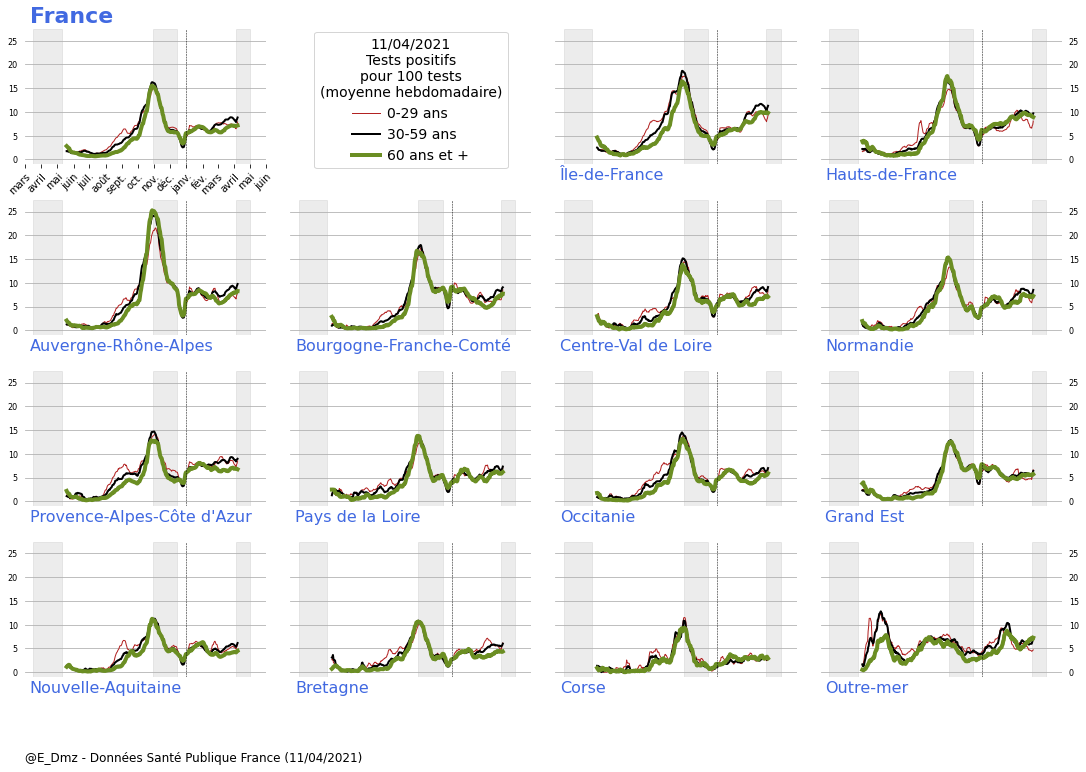

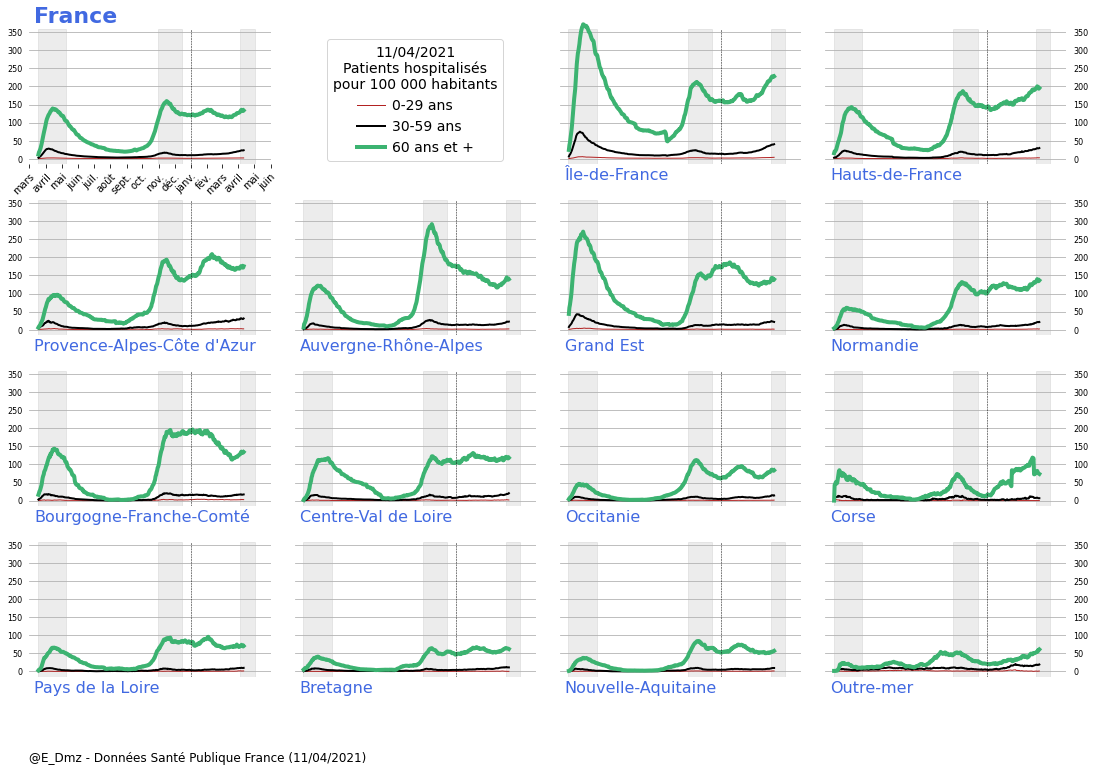

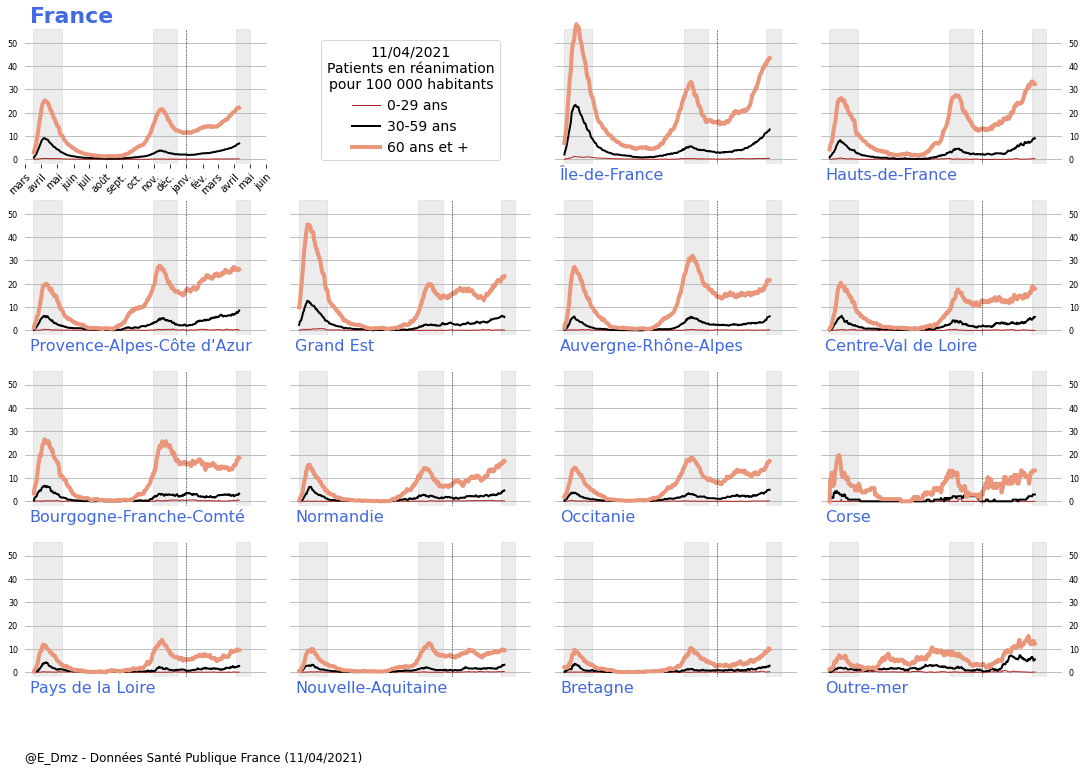

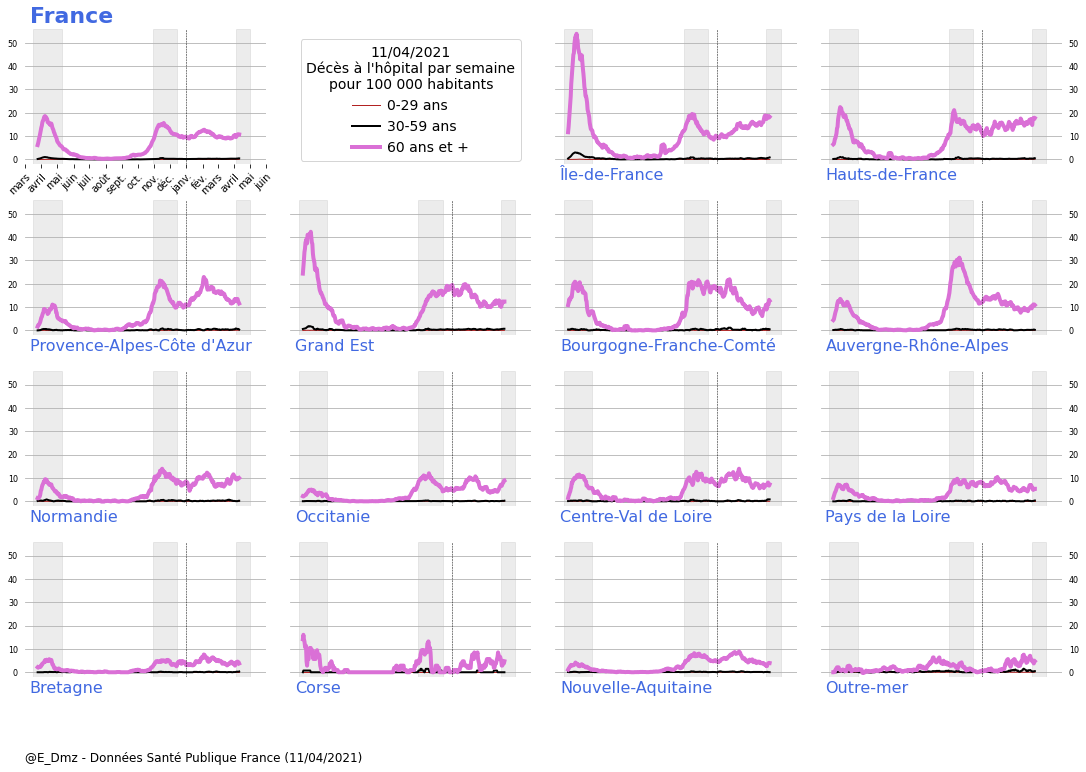

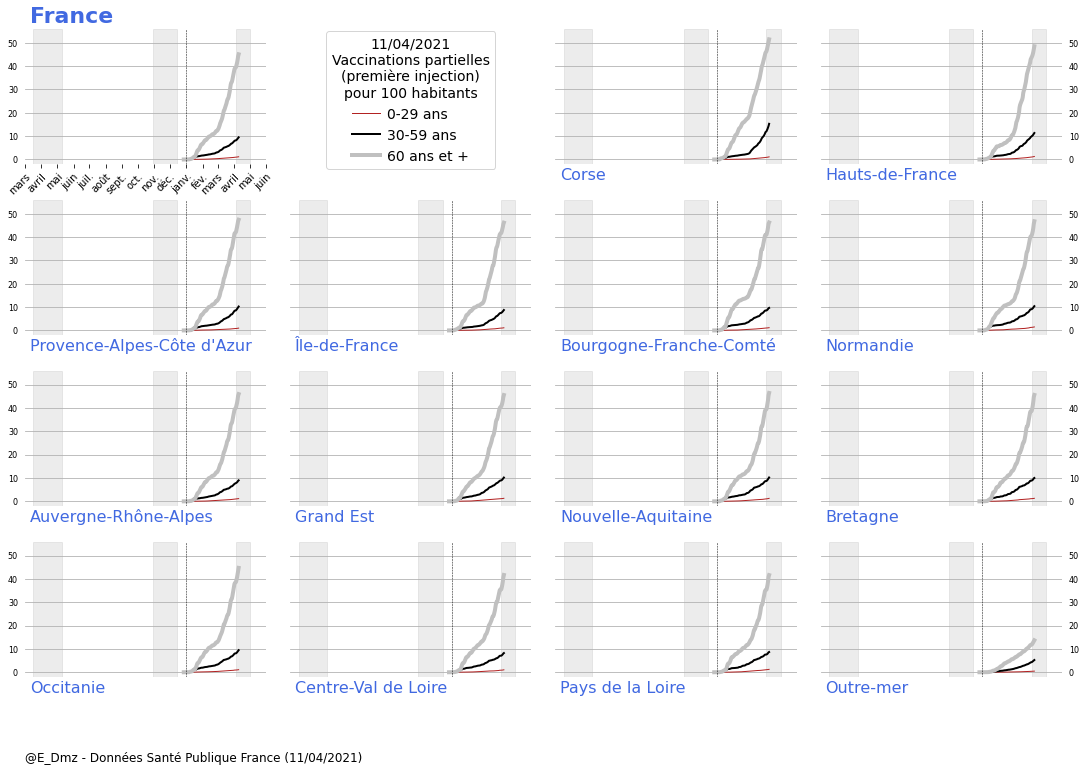

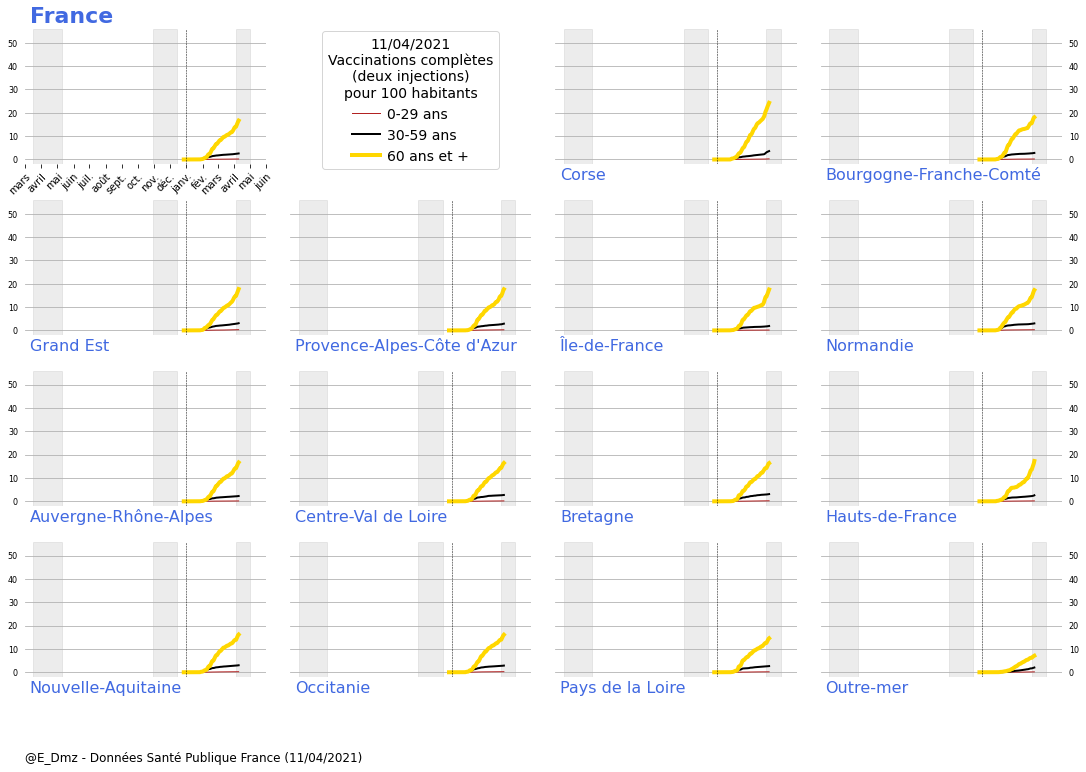

In [5]:
for column_to_plot in graph_options:
    regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')[column_to_plot]
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
    produce_fig(d, column_to_plot, regions_ordered + ['Outre-mer'])

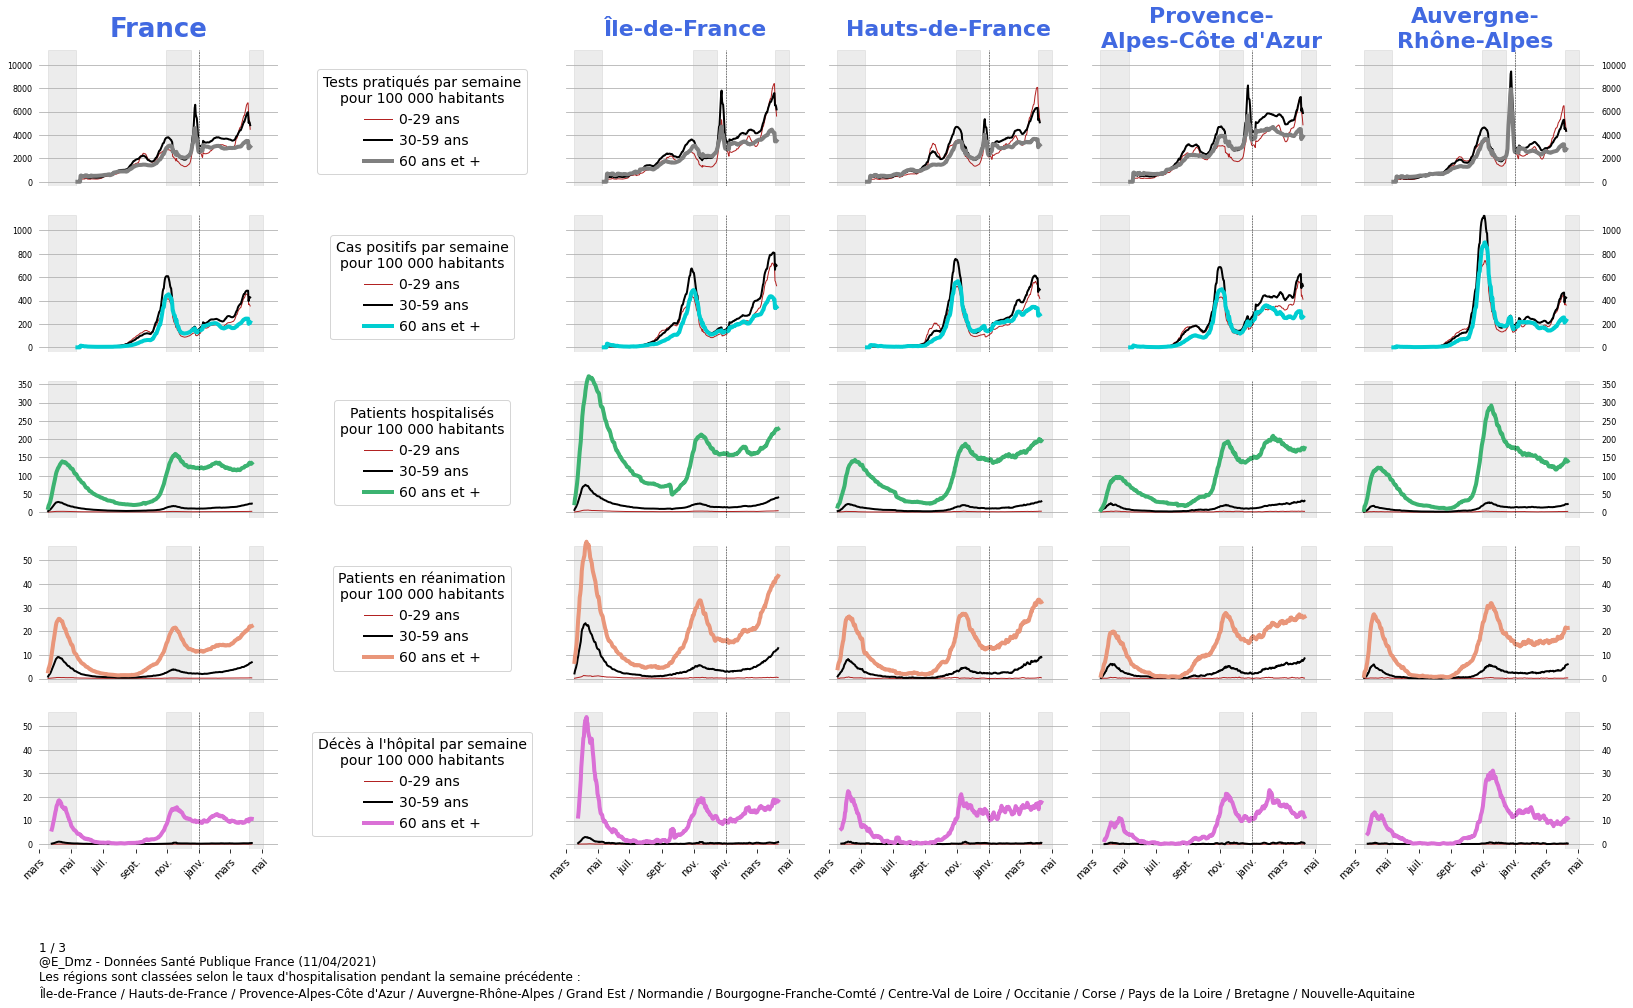

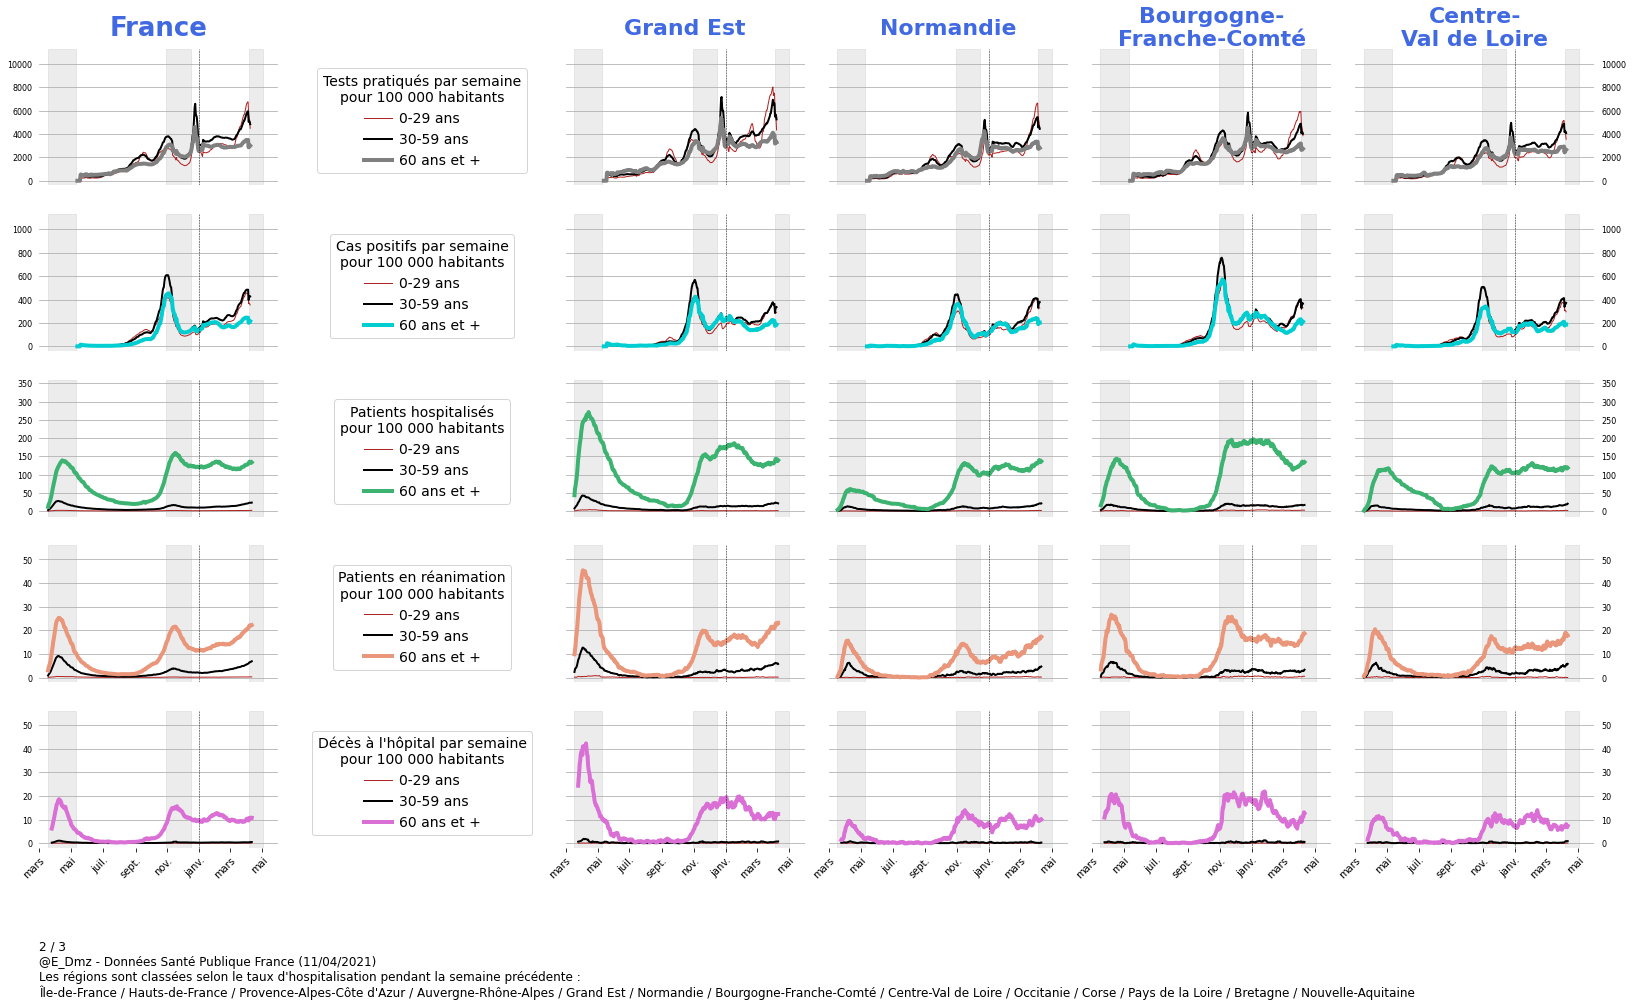

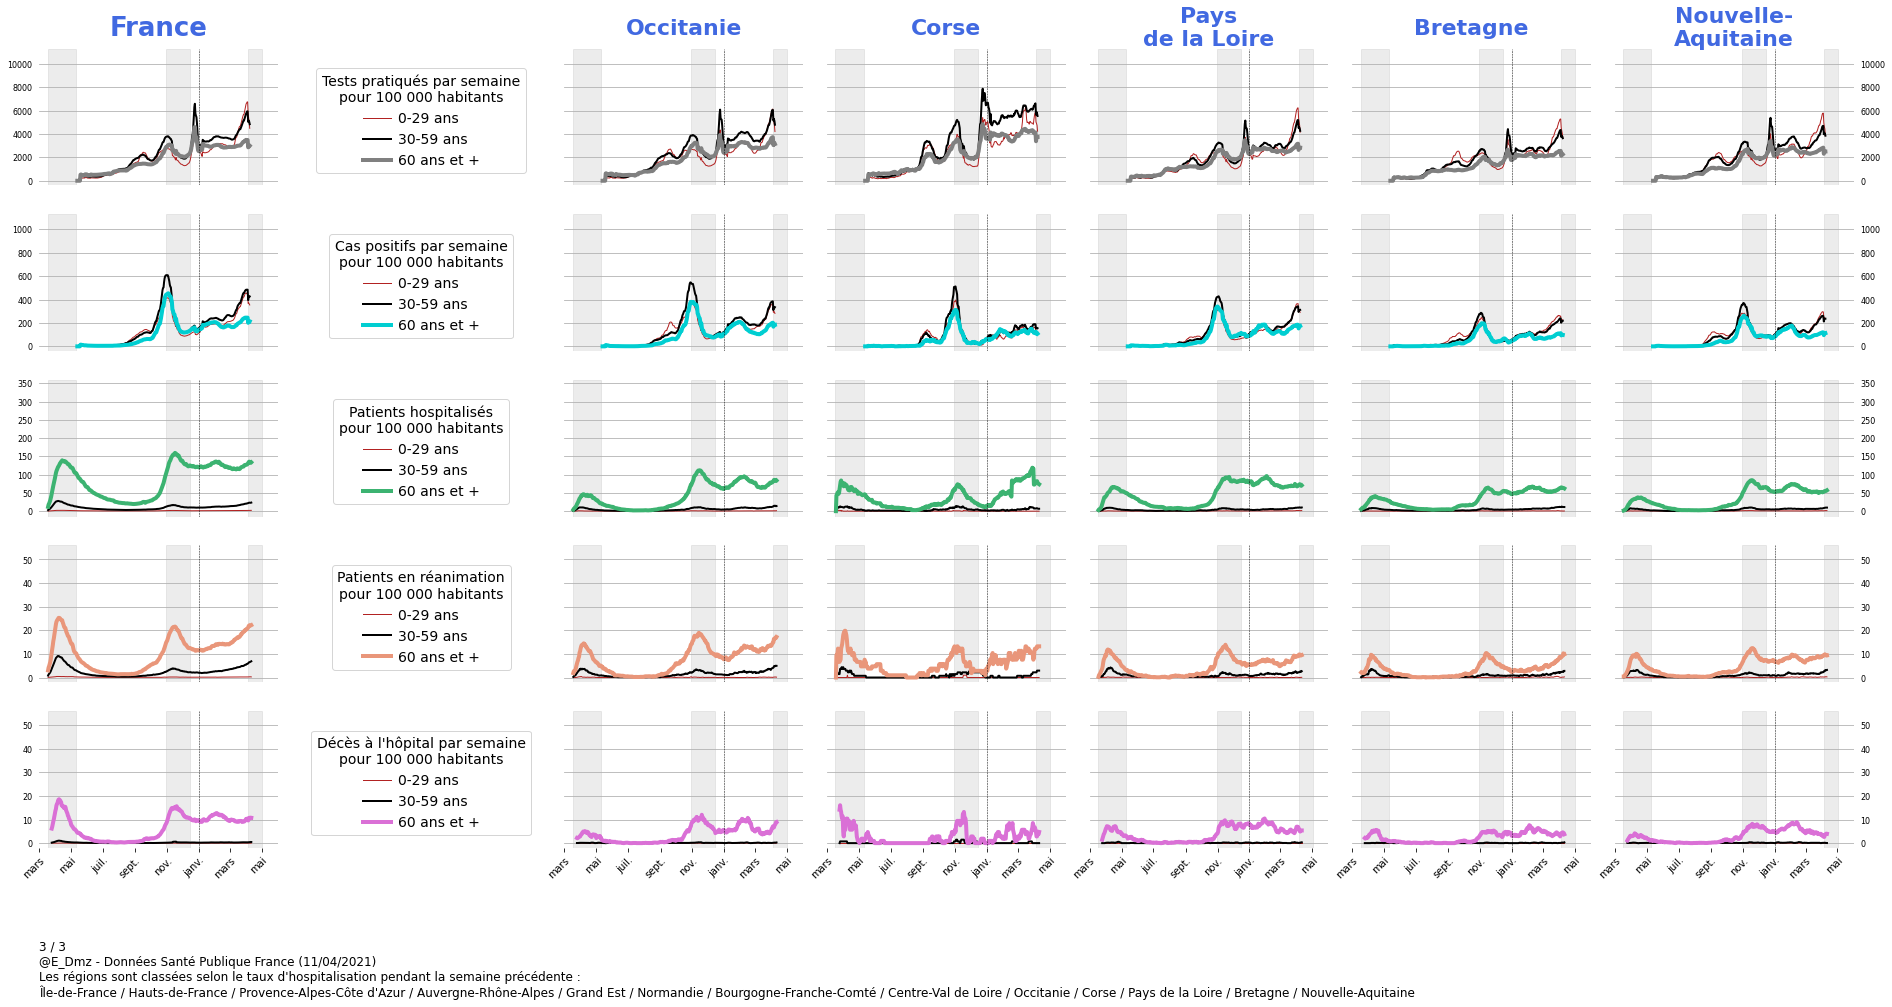

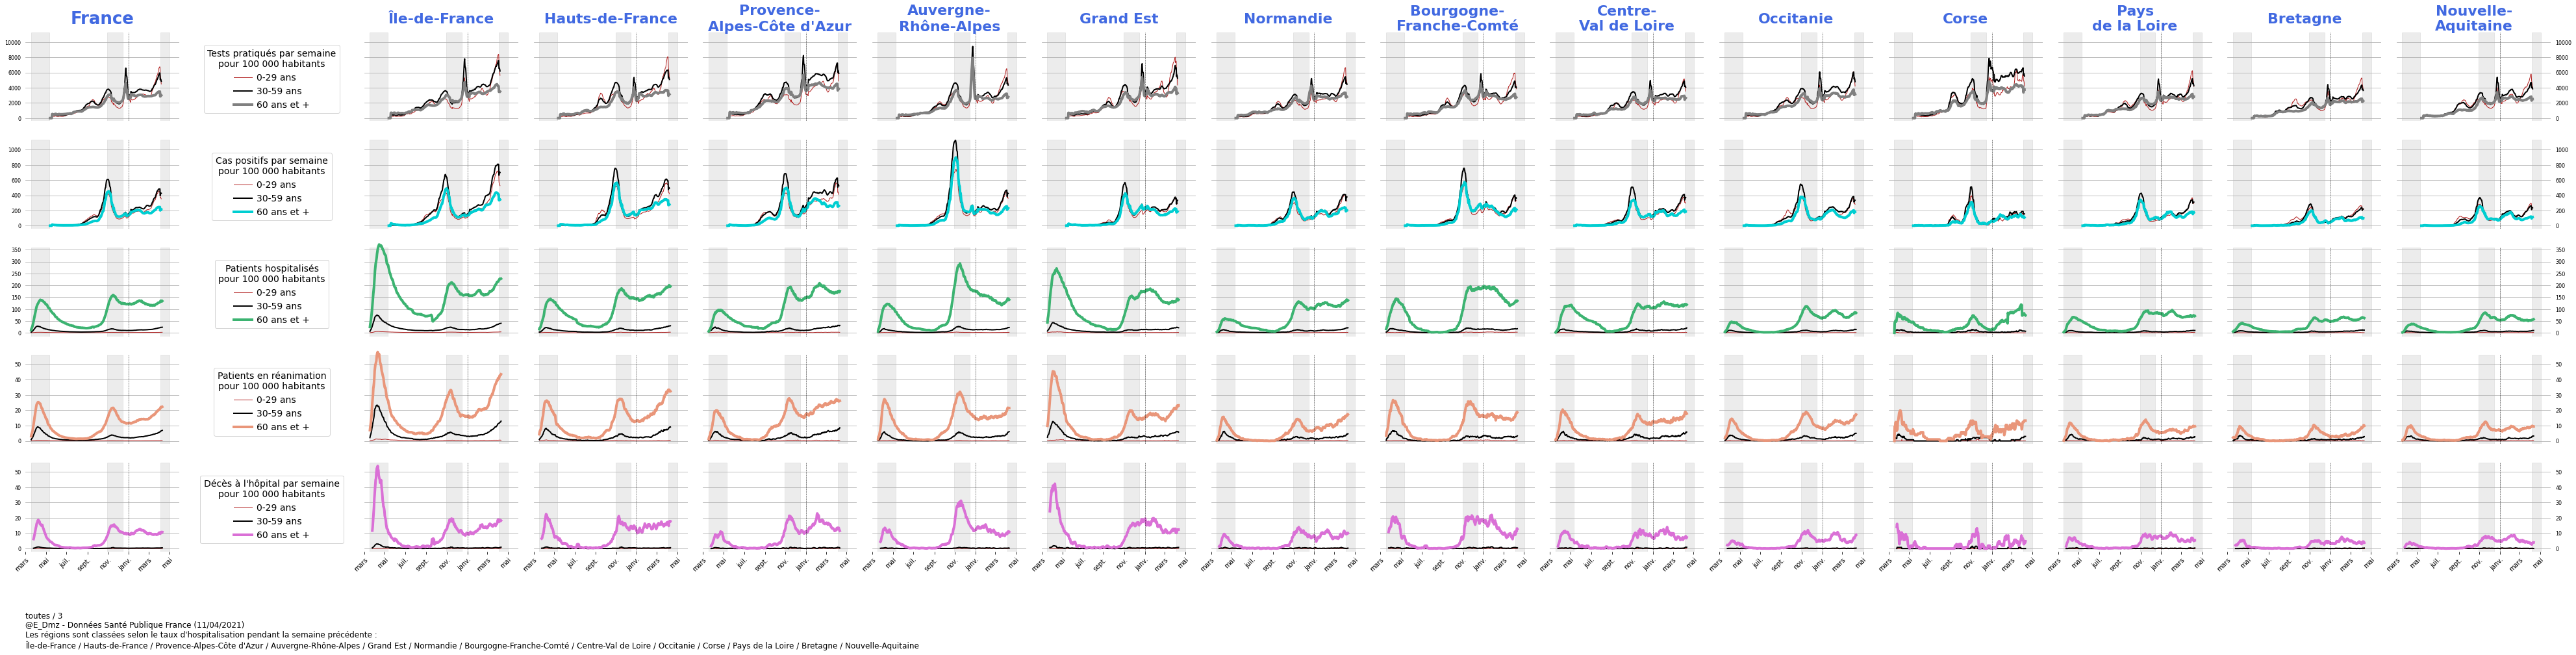

In [6]:
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
produce_fig_lines(d, regions_ordered[:4], regions_ordered, 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered, 2)
produce_fig_lines(d, regions_ordered[8:], regions_ordered, 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

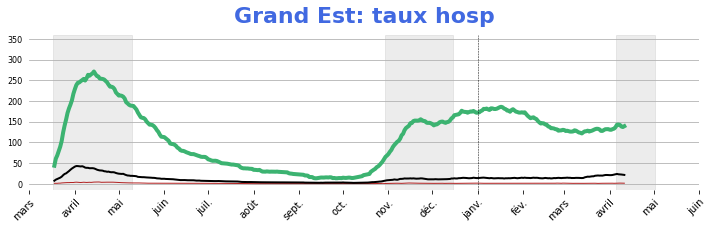

In [7]:
simple_figure(d, 'Grand Est', 'taux hosp')

AttributeError: 'DataFrame' object has no attribute 'dep'

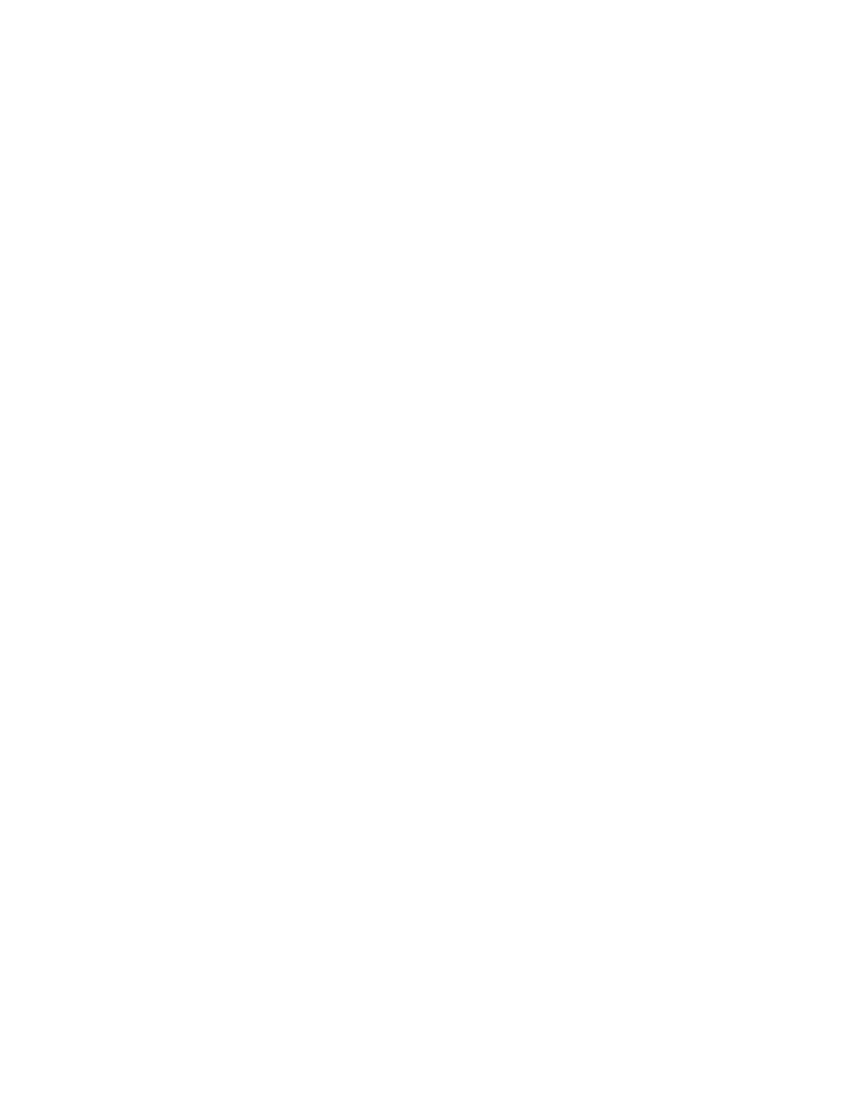

In [8]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

In [ ]:
produce_fig_dep(d, deps)

In [ ]:
produce_fig_dep(d, reg2dep['Île-de-France'])

In [ ]:
for reg in regs:
    print(reg)
    produce_fig_dep(d, reg2dep[reg])